# Figure 02: Ground state

In this notebook, we show how the data in Figure 2 of the publication
[Beg *et al.* Ground state search, hysteretic behaviour and reversal mechanism of skyrmionic textures in confined helimagnetic nanostructures. *Scientific Reports* **5**, 17137 (2015).](https://doi.org/10.1038/s41598-019-44462-2)
can be computed. 

The diagram shows the lowest energy configurations that have been obtained as a function of disk diametre $d$ and applied magnetic field $H$. The two configurations observed are 

- (i) a somewhat uniform state with significant twisting towards the boundaries of the disk - this is called an incomplete Skyrmion (iSk) in the publication. The other configuration is 
- (ii) an isolated Skyrmion (Sk). 

We are going to simulate two points from the parameter space, as shown in the following figure:

<img src="phase-diagram.webp" width=400px>

More precisely, we are going to simulate:

- $(d, \mu_{0}H) = (80\,\text{nm}, 0.2\,\text{T})$ - red dot
- $(d, \mu_{0}H) = (160\,\text{nm}, 0.3\,\text{T})$ - green triangle

The first value is the disk diameter $d$ (thickness is always $10\,\text{nm}$) and the second value is an external magnetic field $H$ applied in the out-of-plane direction.

We are going to relax the system starting from the uniform state. The function to simulate a single point in the parameter space is `parameter_space_point`:

In [1]:
import oommfc as oc
import discretisedfield as df
%matplotlib inline

def parameter_space_point(d, B, initial_state):
    """
    Expected parameters:
    - d : disk diametre [in metres]
    - B : applied field [in Tesla]
    - initial_state: 'skyrmion' or 'uniform'"""
    thickness = 10e-9
    cell = (2.5e-9, 2.5e-9, 2.5e-9)
    p1 = (-d/2, -d/2, -thickness/2)
    p2 = (d/2, d/2, thickness/2)
    mesh = oc.Mesh(p1=p1, p2=p2, cell=cell)
    
    D = 1.58e-3
    Ms = 3.84e5
    A = 8.78e-12

    def Ms_fun(pos):
        x, y, z = pos
        if x**2 + y**2 <= (d/2)**2:
            return Ms
        else:
            return 0

    def m_fun(pos):
        x, y, z = pos
        if x**2 + y**2 <= (d/4)**2:
            return (0, 0, -1)
        else:
            return (0, 0, 1)
        
    if initial_state == 'skyrmion':
        value = m_fun
    elif initial_state == 'uniform':
        value = (0, 0, 1)
        
    system = oc.System(name='parameter-space-point')
    system.hamiltonian = oc.Exchange(A=A) + oc.DMI(D=D, crystalclass='T') + oc.Demag() + \
        oc.Zeeman(H=(0, 0, B/oc.consts.mu0))
    system.m = df.Field(mesh, dim=3, value=value, norm=Ms_fun)
    
    md = oc.MinDriver()
    md.drive(system, overwrite=True)
    
    return system

## Incomplete skyrmion

We now relax the magnetic configuration for the red dot configuration:

In [2]:
system1 = parameter_space_point(80e-9, 0.2, initial_state='uniform')

2019/12/01 12:49: Running OOMMF (parameter-space-point.mif) ... (1.7 s)


The magnetisation is

In [3]:
system1.m.plane(z=0, n=(20, 20)).k3d_vectors(color_field=system1.m.z, head_size=20)

Output()

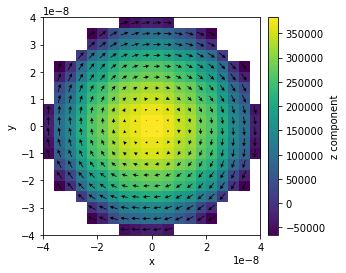

In [4]:
system1.m.plane(z=0, n=(20, 20)).mpl()

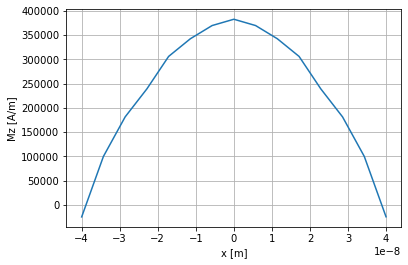

In [5]:
# scan magnetisation along line (as in Published figure 2b)

import numpy as np
import pylab
mz_data = []
xs = []
for x in np.linspace(-40e-9, 40e-9, 15):
    mz = system1.m([x, 0, 0e-9])[2]
    mz_data.append(mz) 
    xs.append(x)
    
# plot the scanned data
pylab.plot(xs, mz_data, '-')
pylab.xlabel('x [m]')
pylab.ylabel('Mz [A/m]');
pylab.grid()

## Isolated skyrmion

For the second point, the disk diametre is greater, and a skyrmion "fits" into the geometry: 

In [6]:
system2 = parameter_space_point(160e-9, 0.3, initial_state='skyrmion')

2019/12/01 12:49: Running OOMMF (parameter-space-point.mif) ... (3.6 s)


In [7]:
system2.m.plane(z=0, n=(30, 30)).k3d_vectors(color_field=system2.m.z, head_size=40)

Output()

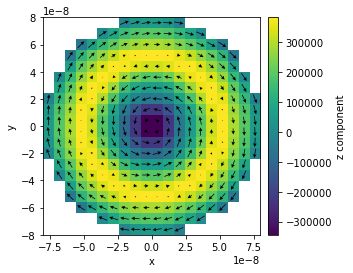

In [8]:
system2.m.plane(z=0, n=(20, 20)).mpl()

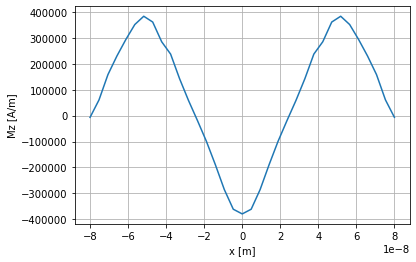

In [9]:
# scan magnetisation along line

import numpy as np
import pylab
mz_data = []
xs = []
for x in np.linspace(-80e-9, 80e-9, 35):
    mz = system2.m([x, 0, 0e-9])[2]
    mz_data.append(mz) 
    xs.append(x)
    
# plot the scanned data
pylab.plot(xs, mz_data, '-')
pylab.xlabel('x [m]')
pylab.ylabel('Mz [A/m]');
pylab.grid()

# More detailed discussion

Please see [figure-02-ground-state-more-details.ipynb](figure-02-ground-state-more-details.ipynb) for a more detailed discussion, including meta stable configurations and computations of the total energy.